<a href="https://colab.research.google.com/github/delibae/health_care_pr/blob/main/project5/%EB%B0%B0%ED%95%9C%EC%A7%84/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import pandas as pd
import numpy as np

# ML
import torch
import torchvision

import torchvision.transforms as transforms
from sklearn.model_selection import StratifiedKFold
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split


from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt
torch.manual_seed(123)#

# Check Data

## load data

In [2]:
root_path = '/content/drive/MyDrive/data/diabetes/archive/'

# image_data = np.load(root_path + 'ImageData.npy')
# target = list(map(int,np.load(root_path + 'target.npy').tolist()))
db = pd.read_csv(root_path + 'diabetes_012_health_indicators_BRFSS2015.csv')
# diabetes_2 = pd.read_csv(root_path + 'diabetes_binary_5050split_health_indicators_BRFSS2015')
# diabetes_3 = pd.read_csv(root_path + 'diabetes_binary_health_indicators_BRFSS2015.csv')
db.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## check unique values

In [3]:
for i in db.columns:
  print(i)
  print(db[i].unique())
  print()

Diabetes_012
[0. 2. 1.]

HighBP
[1. 0.]

HighChol
[1. 0.]

CholCheck
[1. 0.]

BMI
[40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]

Smoker
[1. 0.]

Stroke
[0. 1.]

HeartDiseaseorAttack
[0. 1.]

PhysActivity
[0. 1.]

Fruits
[0. 1.]

Veggies
[1. 0.]

HvyAlcoholConsump
[0. 1.]

AnyHealthcare
[1. 0.]

NoDocbcCost
[0. 1.]

GenHlth
[5. 3. 2. 4. 1.]

MentHlth
[18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]

PhysHlth
[15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11.]

DiffWalk
[1. 0.]

Sex
[0. 1.]

Age
[ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3.

## balancing labels

In [38]:
label_uni = db['Diabetes_012'].unique().tolist()
db_all = []
for i in label_uni:
  to_append = db[db['Diabetes_012'] == i]
  db_all.append(to_append)

In [39]:
print(db_all[0].head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [40]:
min_size = 999999999
for i in db_all:
  if min_size > i.shape[0]:
    min_size = i.shape[0]


In [41]:
print(min_size)

4631


In [42]:
db_final = []
for i in db_all:
  db_final.append(i.sample(n=min_size,random_state=123))
db_final[2].shape[0]

4631

In [43]:
db_fin = pd.DataFrame()
for i in db_final:
  db_fin = pd.concat([db_fin,i],ignore_index=True)

In [44]:
db_fin.shape[0]

13893

## heatmap matrix by features

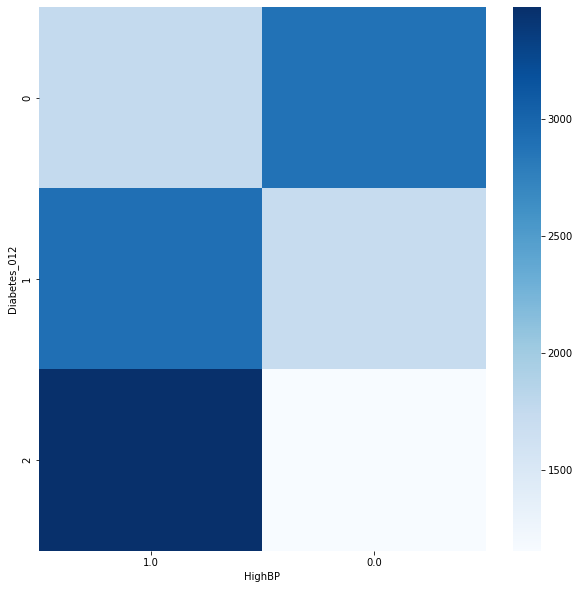

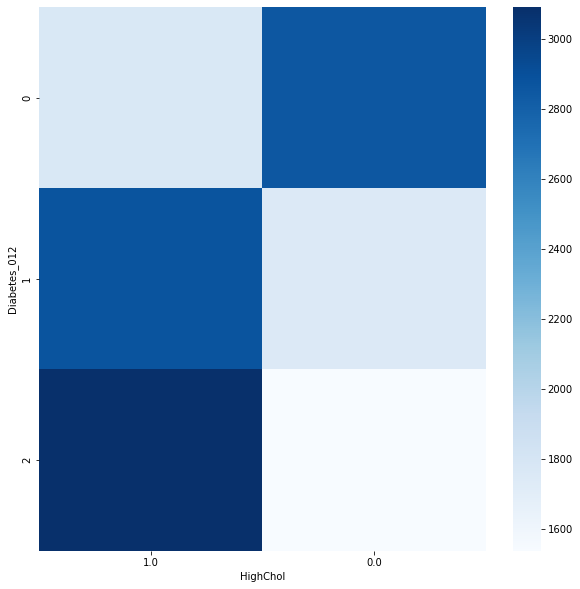

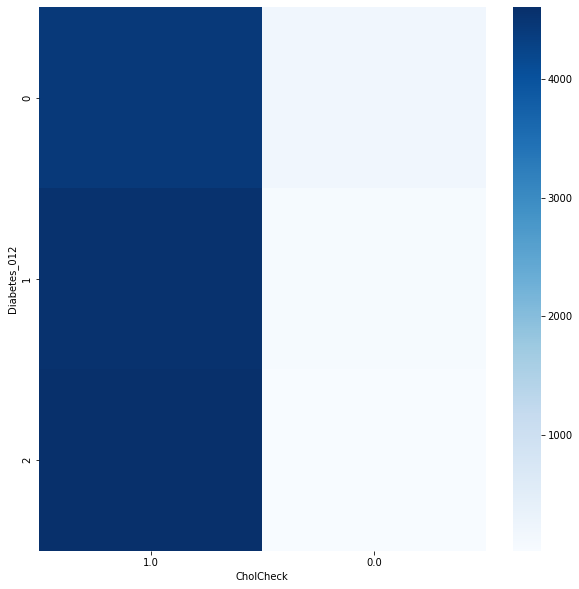

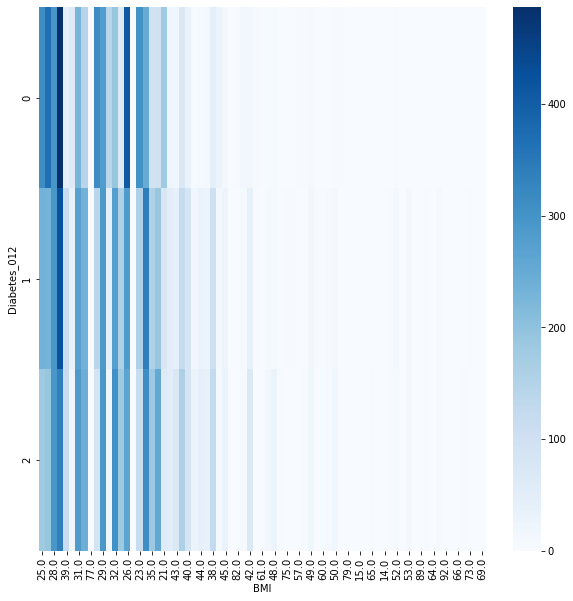

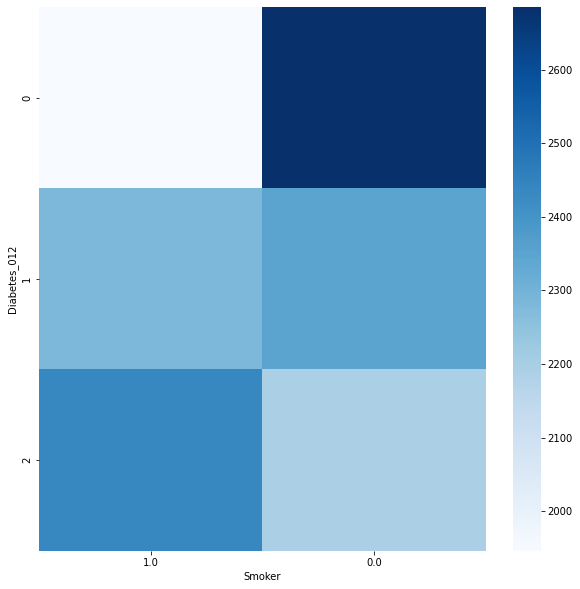

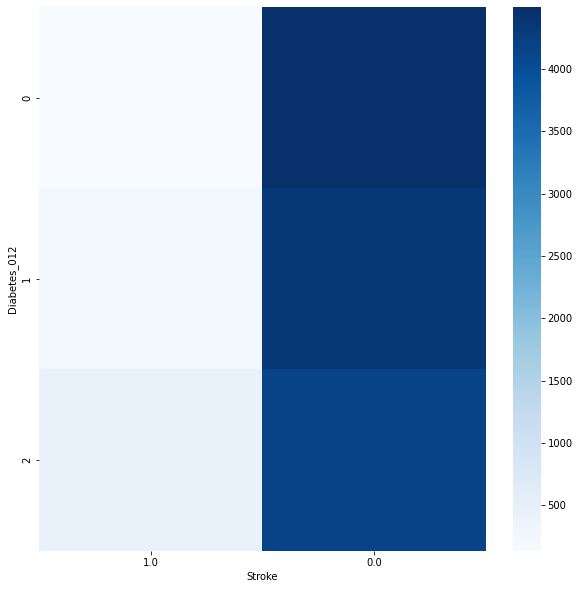

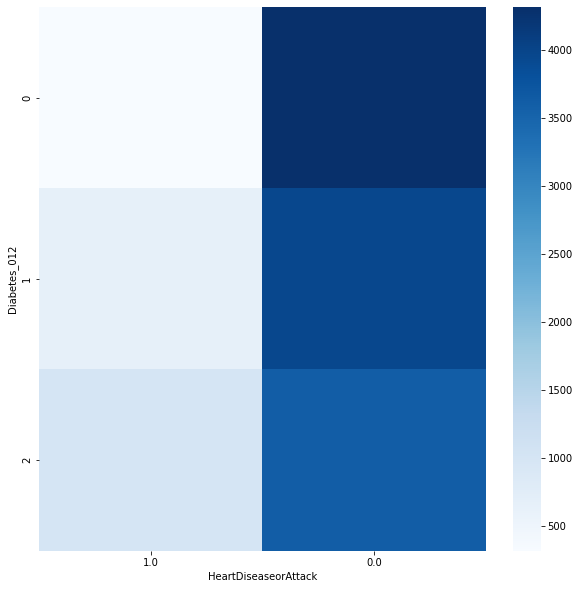

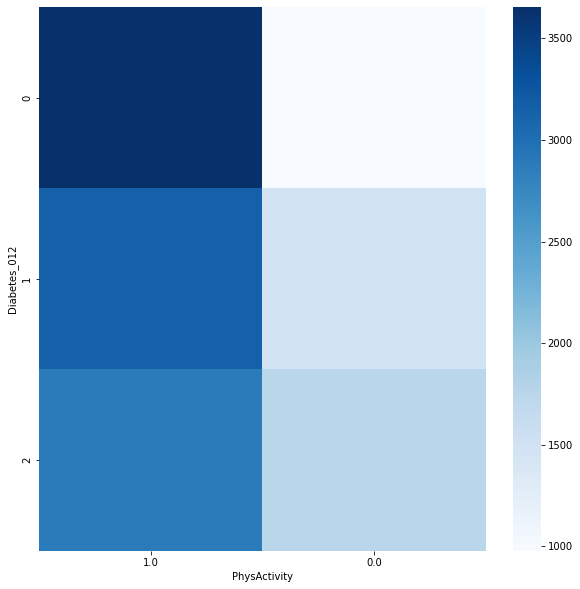

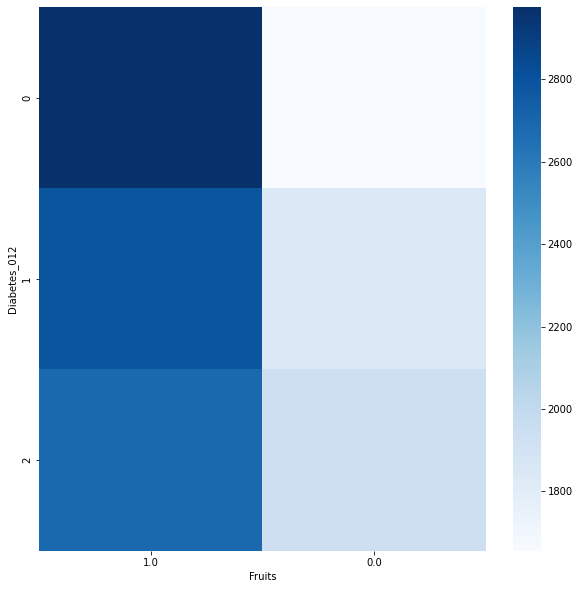

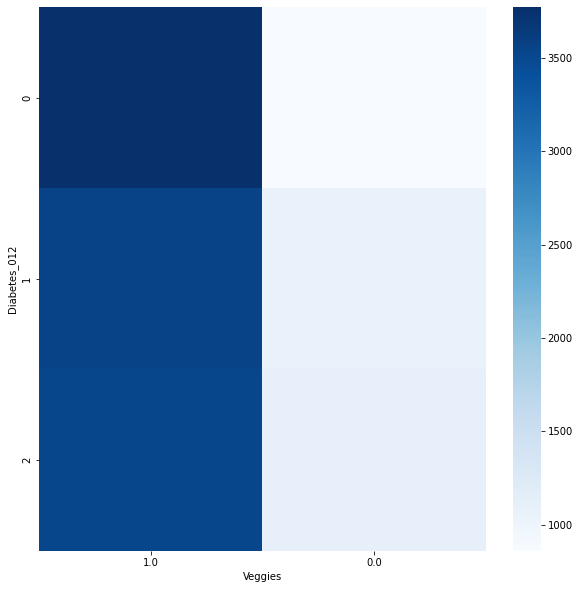

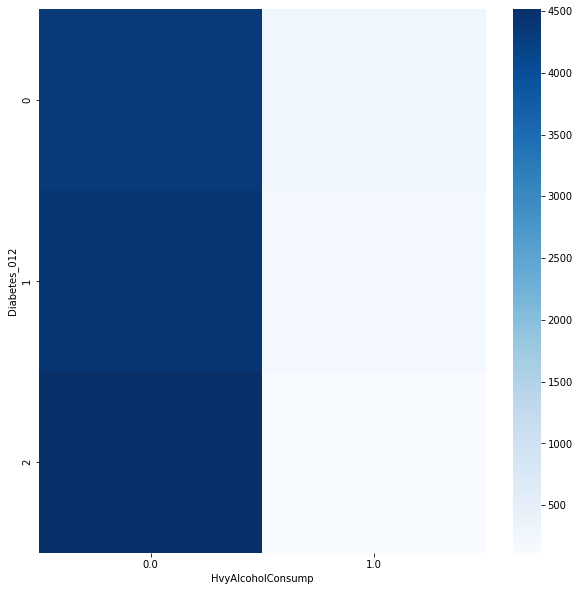

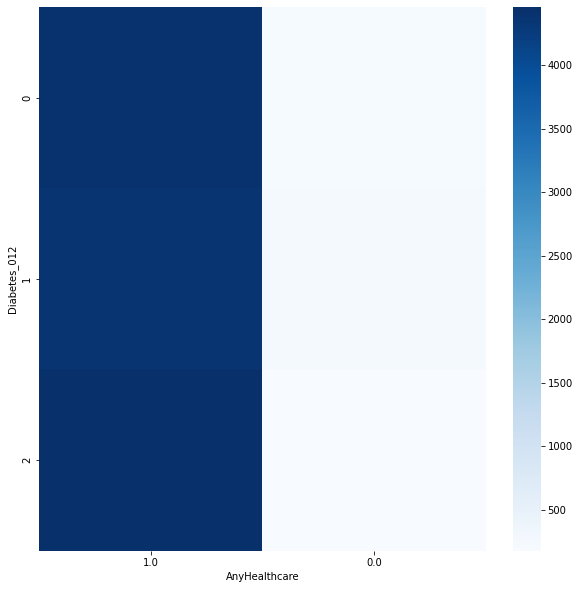

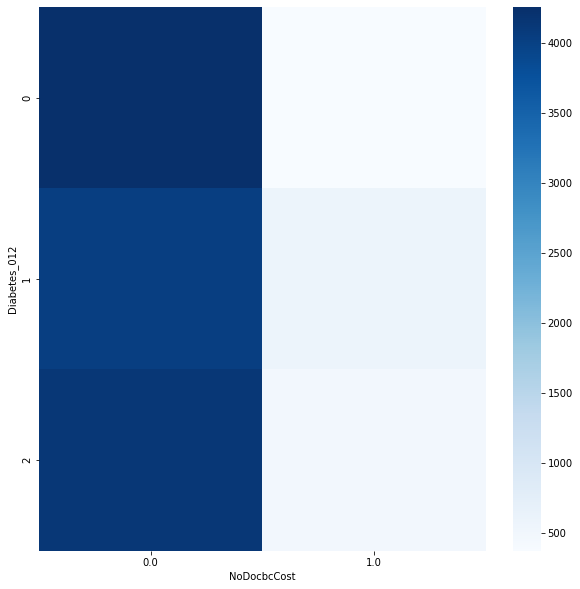

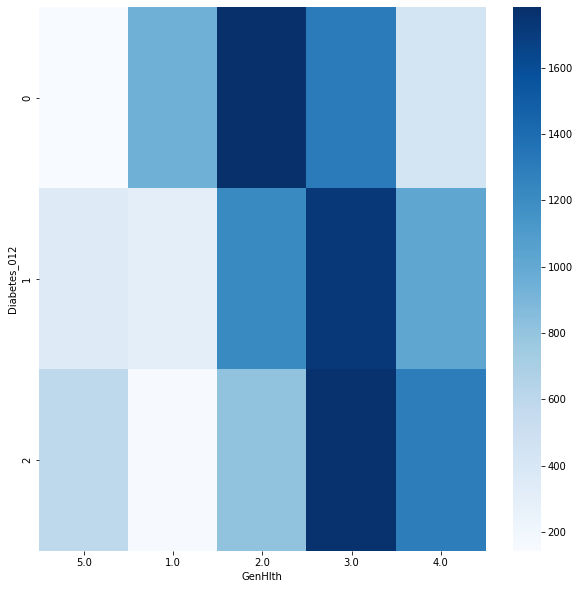

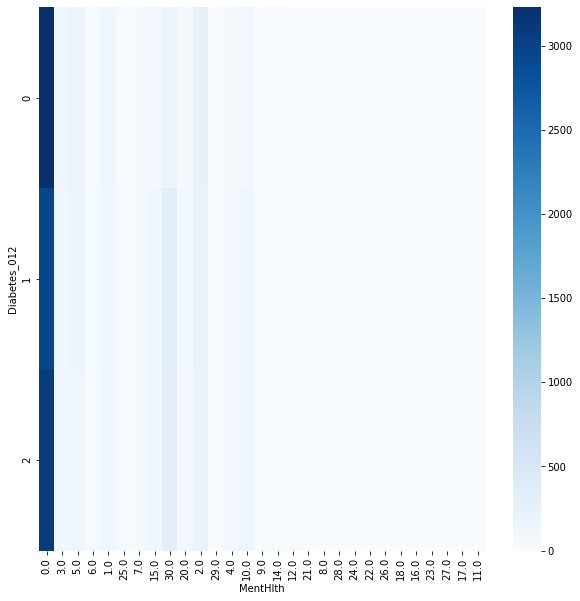

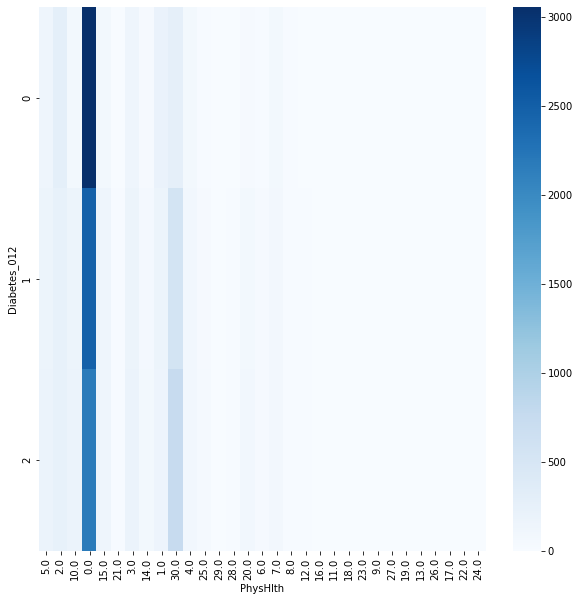

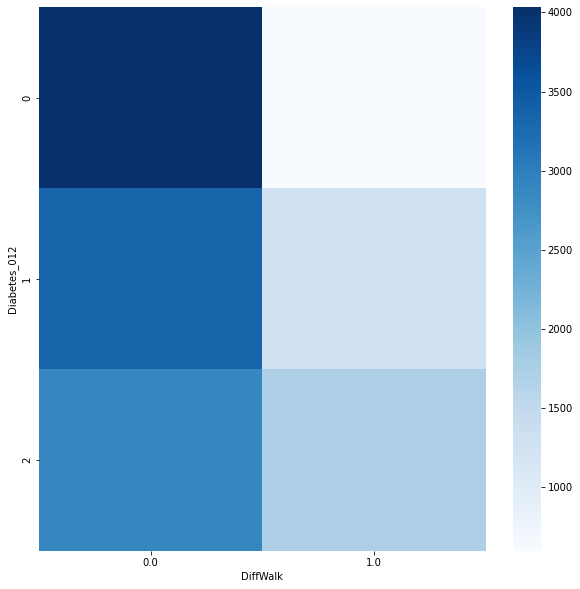

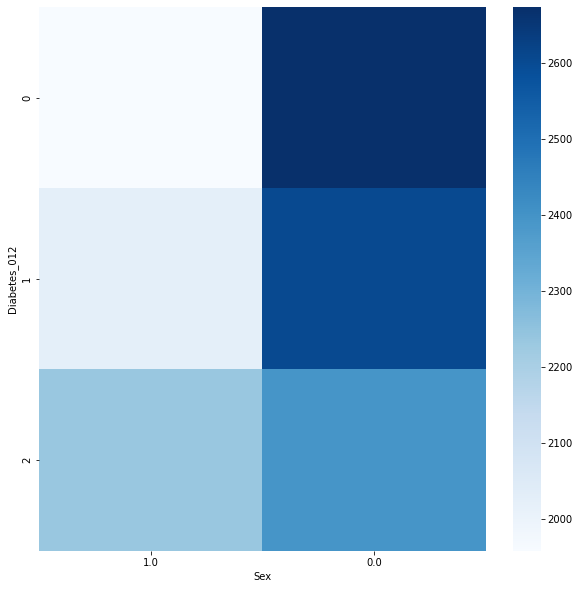

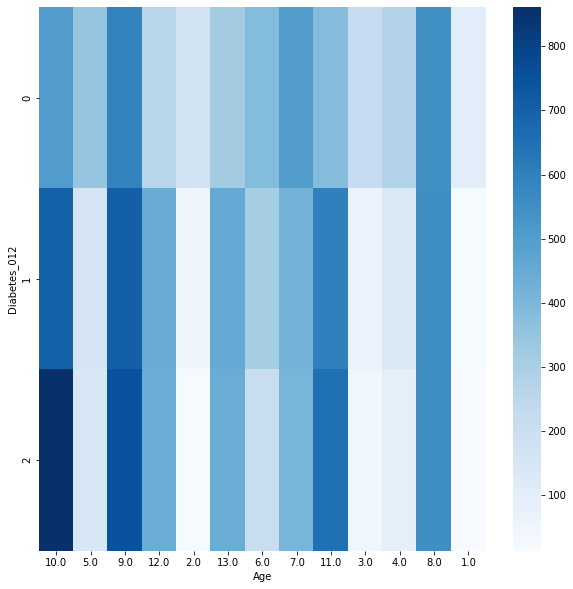

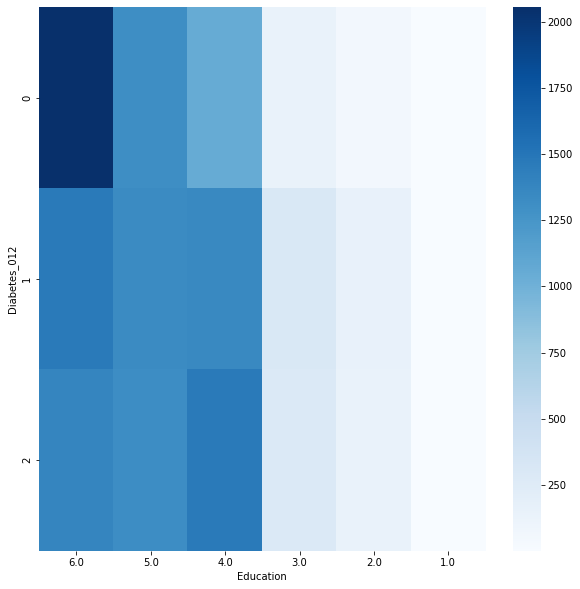

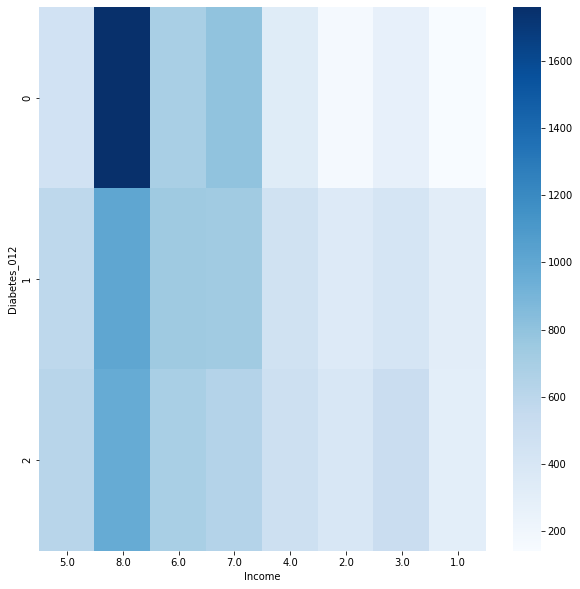

In [45]:
columns = db_fin.columns.tolist()
y = db_fin[columns[0]].tolist()
columns = columns[1:]
for i in columns:
  x = db_fin[i].tolist()
  x_unique = db_fin[i].unique().tolist()
  y_unique = db_fin['Diabetes_012'].unique()
  map = {}

  for xu in range(len(x_unique)):
    map[x_unique[xu]] = xu

  matrix = [[0 for _ in range(len(x_unique))] for _ in range(len(y_unique))]
  for j in range(len(x)):
    y_to = y[j]
    x_to = map[x[j]]
    matrix[int(y_to)][x_to] += 1

  # df_cm_2 = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10,index = [i for i in classes],
  #                      columns = [i for i in classes])

  matrix = pd.DataFrame(matrix, columns = x_unique)
  # matrix = matrix.apply(lambda x: (x-x.mean())/x.std(), axis = 1)
  plt.figure(figsize = (10,10))
  sns.heatmap(matrix, cmap='Blues', annot=False)
  plt.ylabel('Diabetes_012')
  plt.xlabel(i)
  plt.show()
  print()

## 분석

x,y의 관계 에서 진한색의 x값이 겹치면  diabetes와 큰 연관이 없는 feature라고 볼 수 있음
<br/>
- 대표적 예  

CholCheck,Stroke,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth


<br/>

- 전처리 과정에서 column을 drop 하는 것도 noise를 줄이는 방법


In [46]:
print(len(db.columns.tolist()))
to_drop = 'CholCheck,Stroke,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth'
to_drop = to_drop.replace(' ','')
to_drop = to_drop.split(',')
print(len(to_drop))

22
7


# Data Preprocessing

## make x y / drop column

In [47]:
##지우기
# db = pd.read_csv(root_path + 'diabetes_012_health_indicators_BRFSS2015.csv')
# db_fin = db
db_fin_n = db_fin.drop(columns=to_drop)

In [48]:
columns = db_fin.columns.tolist()

y_all = db_fin[columns[0]]
x_all = db_fin[columns[1:]]

In [49]:
columns = db_fin_n.columns.tolist()

y_all_n = db_fin_n[columns[0]]
x_all_n = db_fin_n[columns[1:]]

### normalize

In [50]:

x_mean = x_all.mean()
x_std = x_all.std()

x_all = (x_all - x_mean)/x_all.std()

In [51]:

x_mean_n = x_all_n.mean()
x_std_n = x_all_n.std()

x_all_n = (x_all_n - x_mean_n)/x_all_n.std()

In [52]:
print(y_all.head())
print(x_all.head())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diabetes_012, dtype: float64
     HighBP  HighChol  CholCheck       BMI    Smoker    Stroke  \
0  0.840533  0.891574   0.143934 -0.733446  1.041192  3.912191   
1 -1.189635 -1.121531   0.143934 -0.875055  1.041192 -0.255593   
2  0.840533 -1.121531   0.143934 -0.308619  1.041192 -0.255593   
3 -1.189635 -1.121531   0.143934 -0.733446  1.041192 -0.255593   
4 -1.189635  0.891574   0.143934 -0.450228  1.041192 -0.255593   

   HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  ...  AnyHealthcare  \
0              2.440596      0.659244  0.802434  0.529009  ...       0.221895   
1             -0.409707      0.659244 -1.246118  0.529009  ...       0.221895   
2             -0.409707      0.659244  0.802434  0.529009  ...       0.221895   
3             -0.409707     -1.516779  0.802434  0.529009  ...       0.221895   
4             -0.409707      0.659244  0.802434  0.529009  ...       0.221895   

   NoDocbcCost   GenHlth  MentHlth  

In [53]:
y_all = y_all.to_numpy()
x_all = x_all.to_numpy()

In [54]:
y_all_n = y_all_n.to_numpy()
x_all_n = x_all_n.to_numpy()

In [55]:
print(y_all.shape)
print(x_all.shape)

(13893,)
(13893, 21)


In [56]:
print(y_all_n.shape)
print(x_all_n.shape)

(13893,)
(13893, 14)


# Create Dataloader

## define dataset

In [57]:
class CustomDataset(Dataset):
    def __init__(self, x, label=None):
        self.x = x
        self.label = label
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, i):
        
        x_data = self.x[i]

        return x_data, torch.tensor(self.label[i])

## define dataloader

In [58]:

def get_dataloader(x, y):
    # img_list = get_img_list(x)
    dataset = CustomDataset(x=x, label=y)

    train_dataloader = torch.utils.data.DataLoader(dataset=dataset)

    return train_dataloader

## split train valid

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_all, y_all, test_size=0.2, shuffle=True, stratify=y_all, random_state=34)


In [60]:
x_train_n, x_valid_n, y_train_n, y_valid_n = train_test_split(x_all_n, y_all_n, test_size=0.2, shuffle=True, stratify=y_all_n, random_state=34)


## create dataloader

In [61]:
train_dataloader = get_dataloader(x_train,y_train)
valid_dataloader = get_dataloader(x_valid,y_valid)

# KNN

## drop

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [63]:
# print('Training set score: {:.4f}'.format(knn.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(x_valid, y_valid)))

Test set score: 0.4725


### hyper tuning

In [105]:
epoch = 30
n_best = 1
accuracy_l = []
accuracy = 0
for i in range(1,epoch):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train , y_train)
  a_in = knn.score(x_valid, y_valid)
  accuracy_l.append(a_in)
  if  a_in > accuracy:
    accuracy = a_in
    n_best = i
print(n_best)

29


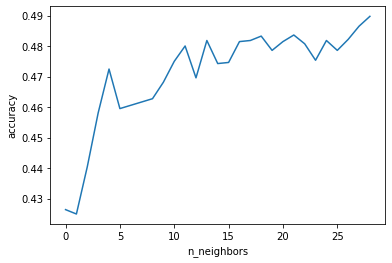

In [106]:
plt.plot(accuracy_l)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

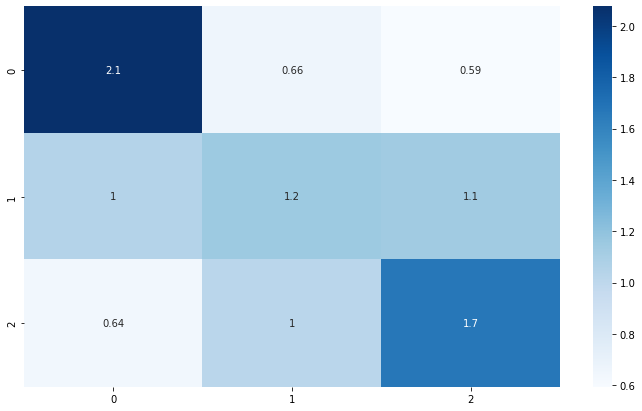

In [108]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = knn.predict(x_valid)
y_true = y_valid

cf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (12,7))
df_cm_2 = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10)
sns.heatmap(df_cm_2, annot=True, cmap='Blues')
plt.show

In [109]:
knn = KNeighborsClassifier(n_neighbors=53)
knn.fit(x_train , y_train)
a_in = knn.score(x_valid, y_valid)
print(accuracy)

0.4897445124145376


## non drop

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train_n , y_train_n)

KNeighborsClassifier(n_neighbors=30)

In [111]:
print('Training set score: {:.4f}'.format(knn.score(x_train_n, y_train_n)))

print('Test set score: {:.4f}'.format(knn.score(x_valid_n, y_valid_n)))

Training set score: 0.5387
Test set score: 0.4847


### hyper tuning

In [112]:
epoch = 30
n_best = 1
accuracy_l = []
accuracy = 0
for i in range(1,epoch):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_n , y_train_n)
  a_in = knn.score(x_valid_n, y_valid_n)
  accuracy_l.append(a_in)
  if  a_in > accuracy:
    accuracy = a_in
    n_best = i
print(n_best)

25


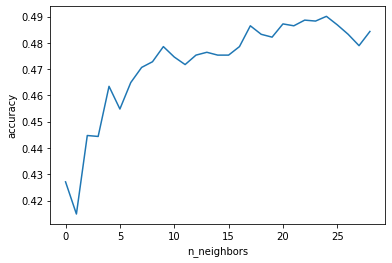

In [113]:
plt.plot(accuracy_l)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

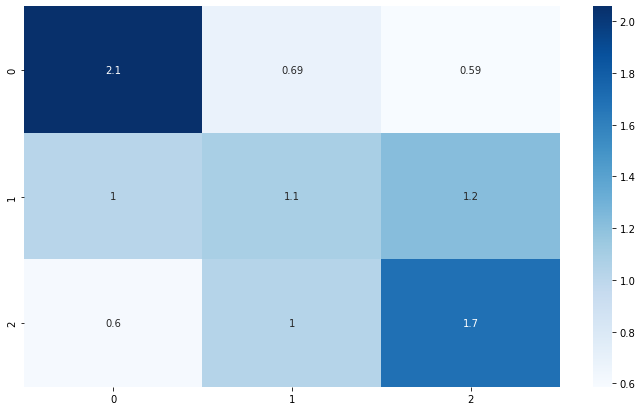

In [114]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = knn.predict(x_valid_n)
y_true = y_valid_n

cf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (12,7))
cf_matrix = cf_matrix/np.sum(cf_matrix) *10
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.show

In [115]:
knn = KNeighborsClassifier(n_neighbors=53)
knn.fit(x_train_n , y_train_n)
a_in = knn.score(x_valid_n, y_valid_n)
print(accuracy)

0.49010435408420294


#  ExtraTreesClassifier

## drop

In [116]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()

etc.fit(x_train,y_train)

yhat = etc.predict(x_valid)
from sklearn import metrics
print('Train set Accuracy :',metrics.accuracy_score(y_train,etc.predict(x_train))*100)
print('Test set Accuracy :',metrics.accuracy_score(y_valid,yhat)*100)

Train set Accuracy : 99.79305380601043
Test set Accuracy : 47.607052896725435


<function matplotlib.pyplot.show(*args, **kw)>

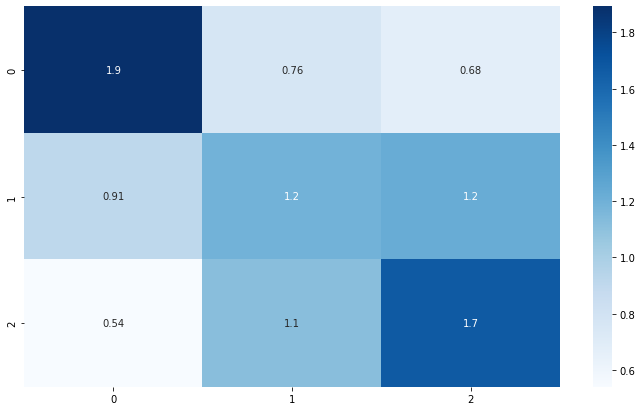

In [118]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = etc.predict(x_valid)
y_true = y_valid

cf_matrix = confusion_matrix(y_true, y_pred)
cf_matrix = cf_matrix/np.sum(cf_matrix) *10
plt.figure(figsize = (12,7))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.show

## non drop

In [119]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()

etc.fit(x_train_n,y_train_n)

yhat = etc.predict(x_valid_n)
from sklearn import metrics
print('Train set Accuracy :',metrics.accuracy_score(y_train_n,etc.predict(x_train_n))*100)
print('Test set Accuracy :',metrics.accuracy_score(y_valid_n,yhat)*100)

Train set Accuracy : 99.52312398776319
Test set Accuracy : 46.59949622166247


<function matplotlib.pyplot.show(*args, **kw)>

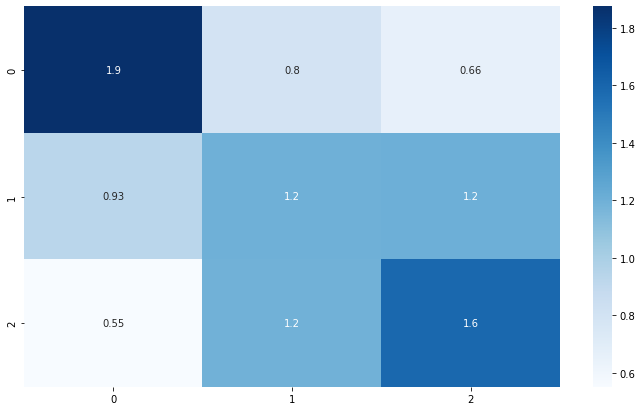

In [120]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = etc.predict(x_valid_n)
y_true = y_valid_n

cf_matrix = confusion_matrix(y_true, y_pred)
cf_matrix = cf_matrix/np.sum(cf_matrix) *10
plt.figure(figsize = (12,7))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.show

In [121]:
np.save('x_train', x_train)
np.save('y_train', y_train)
np.save('x_train_n', x_train_n)
np.save('y_train_n', y_train_n)
